## Bike sharing Assignment

#### Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips. They have contracted a consulting company to understand the factprs on which demand for shared bikes among the people.
Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

#### 1.1 Let us first import `numpy` and `pandas` and read the bike sharing dataset


In [1]:
import numpy as np
import pandas as pd

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### 1.2 Inspect the various aspects of the bike sharing dataframe

In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### 1.3 Data modification

In [8]:
# dropping the unwanted columns ['instant','dteday','casual','registered'] from the dataset

#INSTANT contains only the index values
#DTEDAY contains date which is alreadycovered in other columns namely month and yr
#CASUAL and REGISTERED summed up together to give the 'CNT' variable(target variable)

unwanted= ['instant','dteday','casual','registered']
df.drop(unwanted, inplace=True, axis=1)

In [9]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Perform Categorical encoding

df['season']= df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

df['mnth']= df['mnth'].map({1:'Jan',2:'Feb',3: 'Mar',4: 'Apr',5: 'May',
                  6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'})

df['weathersit']= df['weathersit'].map({1:'Clear_Weather', 2:'Cloudy_Weather', 3:'Light_Snow', 4:'Heavy_Rain'})

df['weekday']= df['weekday'].map({1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat',0:'Sun'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Cloudy_Weather,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Cloudy_Weather,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear_Weather,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear_Weather,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear_Weather,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - understanding the data.

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 2.1 Visualising Numeric Variables

Let's make a pairplot of all the numeric variables


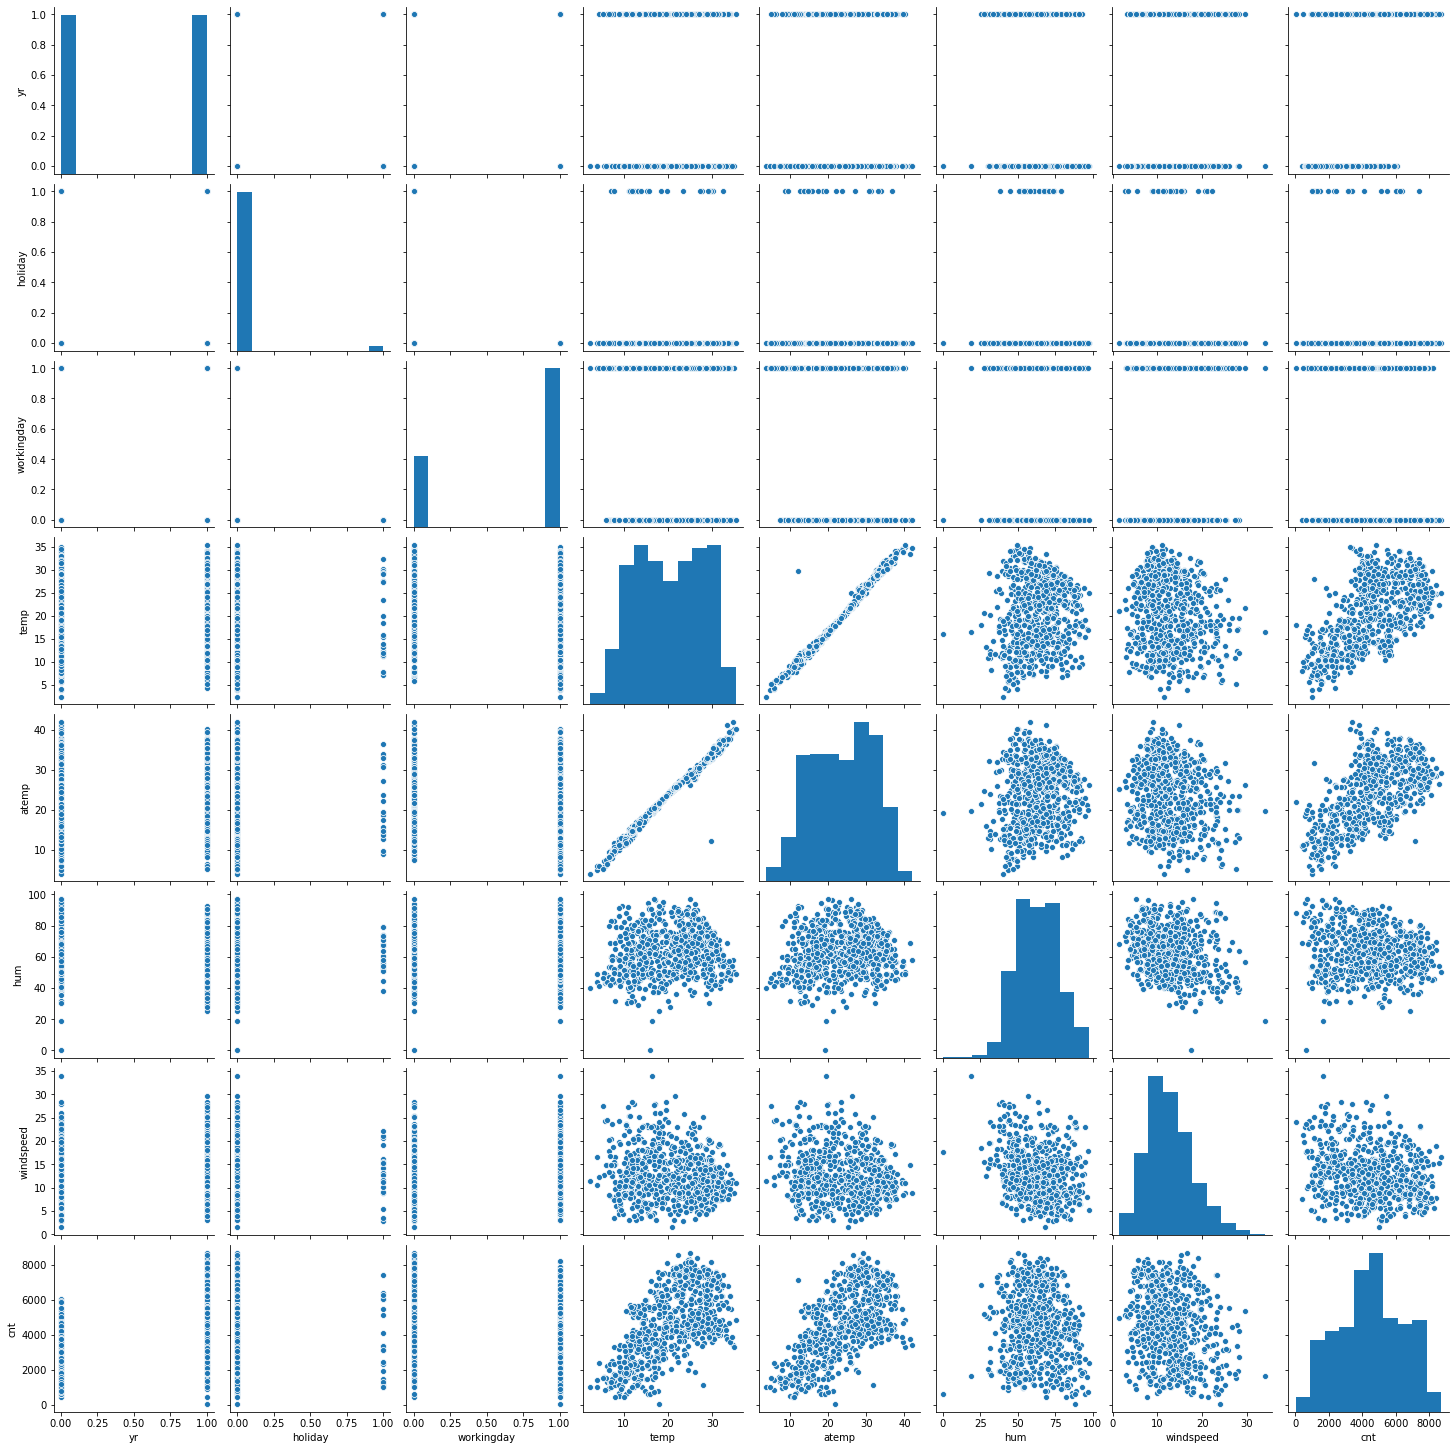

In [12]:
sns.pairplot(df)
plt.show()

`Inference:` We can see some Linear relation between temp, atemp, humidity and windspeed variables with target varibale cnt.

#### 2.2 Visualising Categorical Variables

As we might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

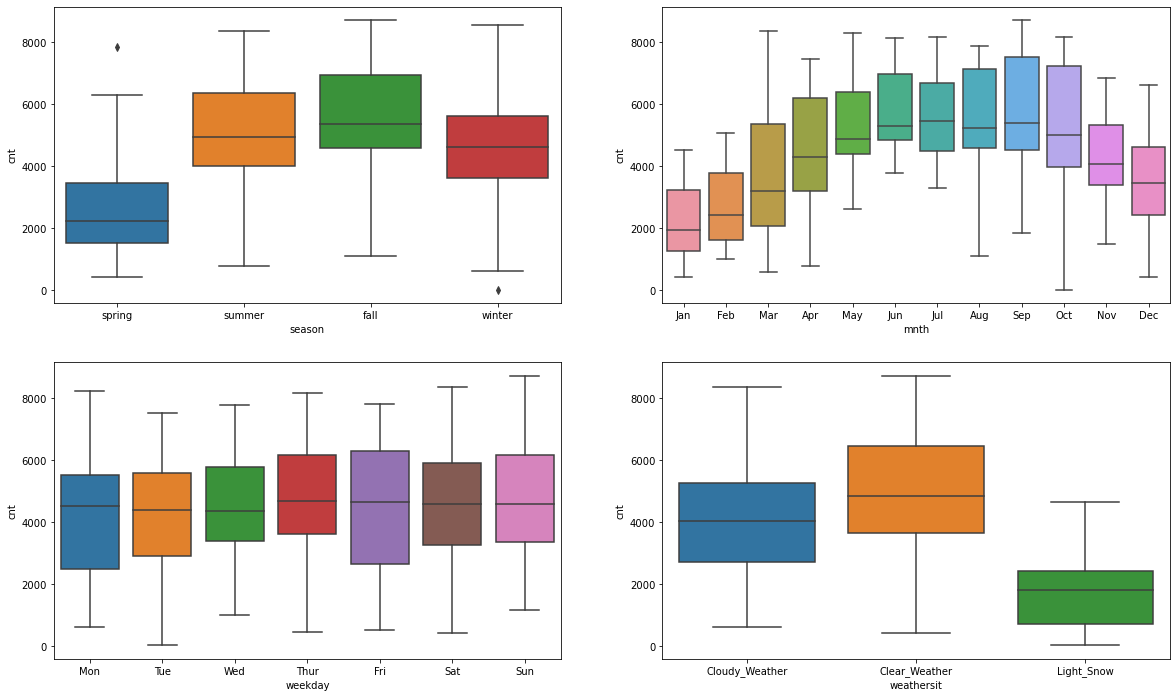

In [13]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

#### 2.3 Correlation Matrix

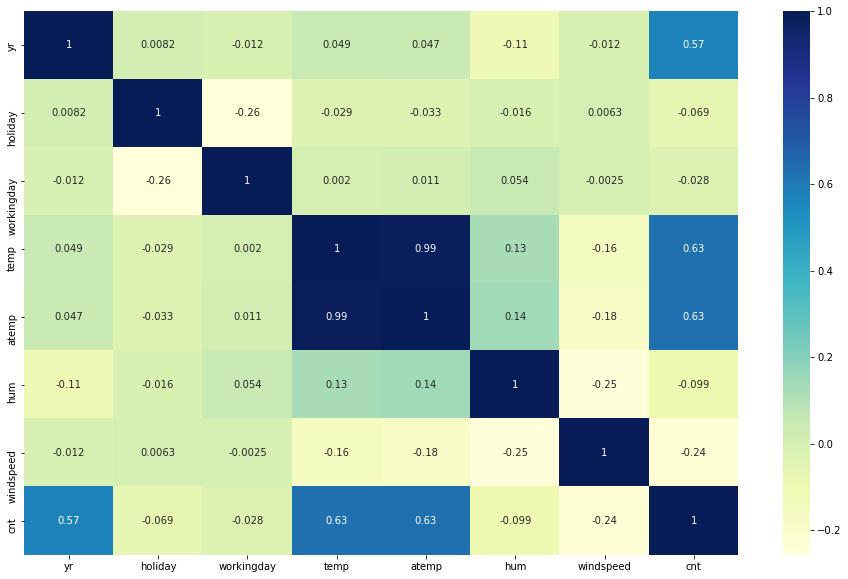

In [14]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

<font color = 'Orange'><h2> Inferences: </h2></font>
As we can see very high correlation between temp and atemp variables, we can drop either one of them.

In [15]:
# Dropping atemp variable from the dataset

df.drop(['atemp'], axis=1, inplace=True)

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Cloudy_Weather,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Cloudy_Weather,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear_Weather,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thur,1,Clear_Weather,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear_Weather,9.305237,43.6957,12.522300,1600


## Step 3: Data Preparation

- Before proceeding with linear model building, we need to prepare the data as per the following steps: 
    - Creating dummy variables for categorical columns
    - Split the data into train and test data. 
    - Scalling the Numerical Variables.


###  3.1 Creating dummy variables for categorical columns

The variable `season`, `mnth`, `weekday`, `weathersit` has many levels. We need to convert these levels into integer first.
For this, we will use dummy variables.


In [17]:
# creating dummy variables

season= pd.get_dummies(df['season'], drop_first= True)
month= pd.get_dummies(df['mnth'], drop_first= True)
weekday= pd.get_dummies(df['weekday'],drop_first= True)
weathersit= pd.get_dummies(df['weathersit'], drop_first= True)

In [18]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [19]:
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [20]:
weekday.head()

,Mon,Sat,Sun,Thur,Tue,Wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [21]:
weathersit.head()

,Cloudy_Weather,Light_Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [22]:
# concatinating variables

df= pd.concat([df, season, month, weekday, weathersit], axis=1)

In [23]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy_Weather,Light_Snow
0,spring,0,Jan,0,Mon,1,Cloudy_Weather,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tue,1,Cloudy_Weather,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wed,1,Clear_Weather,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thur,1,Clear_Weather,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Fri,1,Clear_Weather,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# dropping season, mnth, weekday, weathersit variables as we have created the dummies for it

df.drop(['weekday','season','mnth','weathersit'], axis= 1, inplace= True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy_Weather,Light_Snow
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.2 Splitting the Data into Training and Test Set

In this step we will be splitting the data into train & test 
- Train, where the model uses this dataset for the reference to build the coefficients. 
- Test, check the predicted values on this dataset

In [25]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [26]:
df_train.shape

(510, 29)

In [27]:
df_test.shape

(219, 29)

### 3.3 Rescaling the feature of Training and Test Set

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

num = ['temp','hum','windspeed','cnt']
df_train[num] = scaler.fit_transform(df_train[num])

In [30]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy_Weather,Light_Snow
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy_Weather,Light_Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Training the Model

#### 4.1 Checking correlation matrix of train data

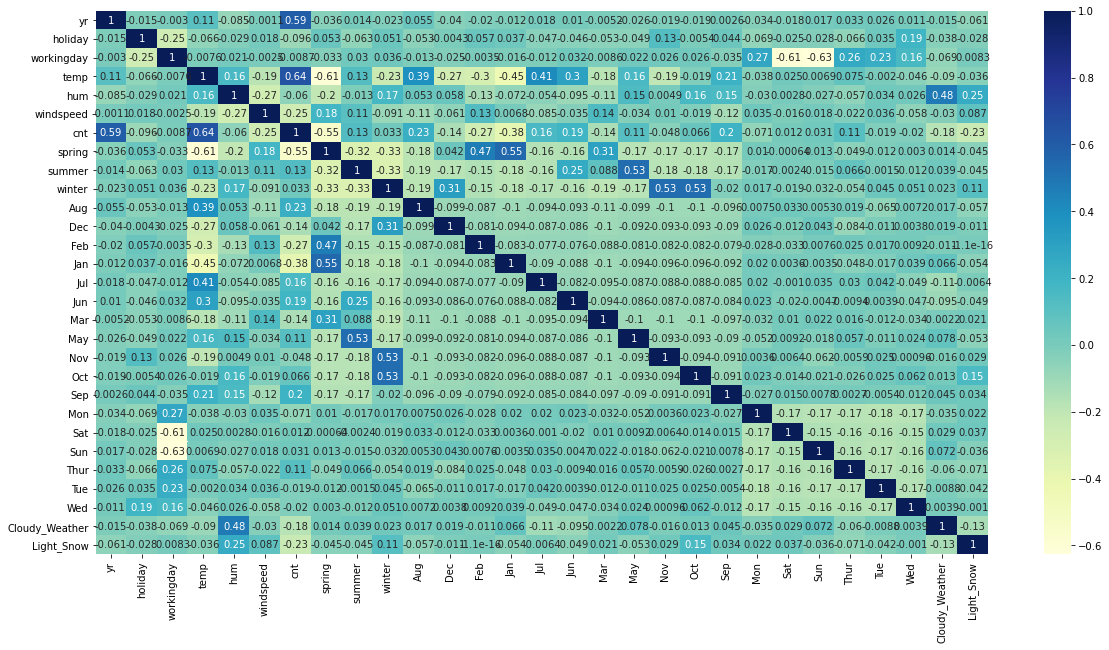

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### 4.2 Dividing into X and Y sets for the model building

In [33]:
y_train =df_train.pop('cnt')
X_train =df_train

## Step 5: Building a linear model

- In this step we will performing the following steps: 
    - With the use of Recursive Feature Elimination (RFE) we will taking 15 most siginificant variables for model building. 
    - Building the model using statsmodel and checking the significance level.
    - Checking the Variance Inflation Factor (VIF) to check the multicolinearity among the variables.
    - Dropping the variables which are highly insignificant, high VIF. 
    
Steps 2, 3 & 4 are repeated untill the variables are highly significant and least multicolinear.

In [34]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [35]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thur', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 10),
 ('Cloudy_Weather', True, 1),
 ('Light_Snow', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy_Weather',
       'Light_Snow'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon', 'Sat',
       'Sun', 'Thur', 'Tue', 'Wed'],
      dtype='object')

### Defining funtions for model building and VIF

In [39]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# defing a function to build a model 

def model_def(y_train, X_train): 
    X_train_sm= sm.add_constant(X_train)
    lm = sm.OLS(y_train, X_train_sm)
    
    return lm.fit()

In [41]:
# defing a function to check the VIF 

def check_vif(X): 
    
    vif= pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return vif

<font color = 'Orange'><h4> Building Model 1 </h4></font>

In [42]:
#Creating X_test dataframe with RFE selected variables

X_train_rfe1 = X_train[col]

In [43]:
# Running the linear model

lm1 = model_def(y_train,X_train_rfe1)   

In [44]:
# Print the summary of the model

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        22:04:17   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.

In [45]:
check_vif(X_train_rfe1)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
13,Cloudy_Weather,2.32
0,yr,2.09
11,Nov,1.83
9,Jan,1.75


Eventhough the R2 & Adjusted R2 is having a good values of 84.5% & 84% there are some variables which are have high multicolinearity but p values are below 0.05.
- Humidity having very high VIF which is highly colinear with other variables 

<font color = 'Orange'><h4> Let's drop `hum` and rebuild model 2</h4></font>

In [46]:
X_train_rfe2 = X_train_rfe1.drop(['hum'], axis =1)
lm2 = model_def(y_train,X_train_rfe2)
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.57e-186
Time:                        22:04:18   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.032      7.

In [47]:
check_vif(X_train_rfe2)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
10,Nov,1.80
8,Jan,1.66
9,Jul,1.59
12,Cloudy_Weather,1.56


Eventhough the R2 & Adjusted R2 is having a good values of 84% & 83.5% there are some variables which are have high multicolinearity but p values are below 0.05.
- Temp having very high VIF which is highly colinear with other variables 

<font color = 'Orange'><h4>Let's drop `temp` and rebuild model 3</h4></font>

In [48]:
X_train_rfe3 = X_train_rfe2.drop(['temp'], axis =1)
lm3 = model_def(y_train,X_train_rfe3)
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          5.50e-160
Time:                        22:04:19   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5961      0.016     37.

In [49]:
check_vif(X_train_rfe3)

,Features,VIF
2,windspeed,3.88
3,spring,2.89
5,winter,2.84
4,summer,2.01
0,yr,1.83
9,Nov,1.79
7,Jan,1.64
11,Cloudy_Weather,1.52
6,Dec,1.45
8,Jul,1.20


R2 & Adjusted R2 values have decreased though at 79.3% & 78.7% and also there are some variables which are insignificant and but vif < 5.
- p value of July is > 0.05

<font color = 'Orange'><h4>Let's drop `Jul` and rebuild model 4</h4></font>

In [50]:
X_train_rfe4 = X_train_rfe3.drop(['Jul'], axis =1)
lm4 = model_def(y_train,X_train_rfe4)
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.36e-161
Time:                        22:04:19   Log-Likelihood:                 439.28
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5892      0.014     42.

In [51]:
check_vif(X_train_rfe4)

,Features,VIF
2,windspeed,3.52
5,winter,2.74
3,spring,2.71
4,summer,1.86
8,Nov,1.79
0,yr,1.77
7,Jan,1.64
10,Cloudy_Weather,1.52
6,Dec,1.45
9,Sep,1.16


R2 & Adjusted R2 values have decreased though at 79.3% & 78.7% and also there are some variables which are insignificant and but vif < 5.
- p value of winter is > 0.05

<font color = 'Orange'><h4>Let's drop `winter` and rebuild model 5</h4></font>

In [52]:
X_train_rfe5 = X_train_rfe4.drop(['winter'], axis =1)
lm5 = model_def(y_train,X_train_rfe5)
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          7.42e-162
Time:                        22:04:19   Log-Likelihood:                 438.82
No. Observations:                 510   AIC:                            -853.6
Df Residuals:                     498   BIC:                            -802.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5845      0.013     45.

In [53]:
check_vif(X_train_rfe5)

,Features,VIF
2,windspeed,3.22
3,spring,2.36
0,yr,1.74
4,summer,1.69
6,Jan,1.62
9,Cloudy_Weather,1.47
7,Nov,1.23
8,Sep,1.16
5,Dec,1.13
1,holiday,1.06


<font color= 'Brownm'><h2>Inferences </h2></font> 

From this we could conclude that the Independent Variables are having significant relationship and Features are not having any multicolinearity.

Let's perform the residual analysis if the model is meeting the assumptions used in Linear Regression.

<font color = 'Green'><h3>`R-squared` of Train set is 79.2%</h3></font>

<font color = 'Green'><h3>`Adjusted R-squared` of Train set is 78.7%</h3></font>

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

#### 6.1 Plot the distribution of residual errors 

In [54]:
X_train_final = sm.add_constant(X_train_rfe5)
y_train_pred = lm5.predict(X_train_final)

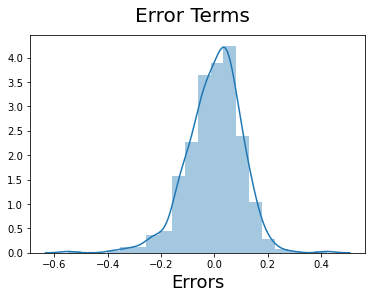

In [55]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading # X-label
plt.xlabel('Errors', fontsize = 18)  
plt.show() 

####  6.2 Scatter Distribution b/w True Values and Predicted Values of train set

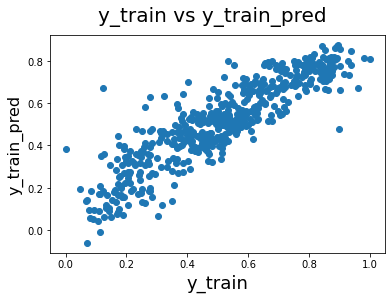

In [56]:
# Plotting y_train and y_train_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)      
plt.show()

<font color = 'Green'><h3> Inference </h3></font>
  - Here we can see that the histogram is normally distributed for error terms with mean centered at 0.
  - The scatter plot distribution between the actual values and the predicted values follow the linear relationship.

## Step 7: Making Predictions on test set

#### 7.1 Applying the scaling on the test sets

In [57]:
num = ['temp','hum','windspeed','cnt']
df_test[num] = scaler.transform(df_test[num])

In [58]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Cloudy_Weather,Light_Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 7.2 Dividing into X_test and y_test

In [59]:
y_test= df_test.pop('cnt')
X_test= df_test

In [60]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe5.columns]


# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [61]:
y_test_pred= lm5.predict(X_test_new)

## Step 8: Model Evaluation

We have build the model and let's check some of the parameters so that the model we have built is correct or not. The following:

   - 𝑅2  & Adjusted  𝑅2 
   - Scatter Distribution b/w y_test & y_test_pred

####  8.1 𝑅2  & Adjusted  𝑅2 calculation for test set

In [62]:
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
# we can calculate the R2 by using in built function 

r2_test= r2_score(y_true= y_test, y_pred= y_test_pred)
r2_test

0.7772012091843699

The formula for the Adjusted $R^2$ is given by: 

Adjusted $R^2= 1 − \frac{(1−R^2)(N−1)}{(N−p−1)}$

In [64]:
# let's calculate the adjusted R2 by placing the values manually
# Here R2 is the r2_test 
# N is the length of samples 
# p is the number of independent Variables 
# let's plugin the values and check the adjusted R2 values

adj_r2_test= 1 - ((1-r2_test)*(len(X_test_new)-1))/(len(X_test_new) - len(X_test_new.columns) - 1)
adj_r2_test

0.7642226388455953

####  8.2 Scatter Distribution b/w True Values and Predicted Values of test set

Text(0, 0.5, 'y_test_pred')

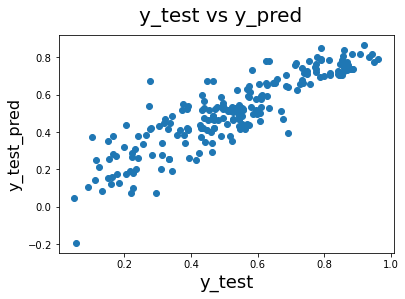

In [65]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)      

<font color= 'Brown'><h2>Inferences </h2></font> 

The scatter plot distribution between the actual values and the predicted values follow the linear relationship.

<font color = 'Green'><h3>`R-squared` of Test set is 77.7%</h3></font>

<font color = 'Green'><h3>`Adjusted R-squared` of Test set is 76.4%</h3></font>

<font color = 'red'><h1>Model Equation</h1></font> 

From the model that we have defined the equation of the fitted line is given by: 
<img>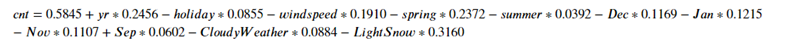


<font color = 'red'><h1>Conclusion</h1></font> 

- With each year the demand of bike sharing has being increased. 
- We Can focus more in the month of September to increase the bike demand.
- As the difference between the Test dataset and train dataset have the `Adjusted R2` 2.2% the model is acceptable.